In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
#  import the dataset
df_telecom = pd.read_csv("telecom_churn_data.csv")
df_telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df_telecom.shape

(99999, 226)

In [4]:
df_telecom.info(verbose =1 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
             'date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7',
             'date_of_last_rech_data_8', 'date_of_last_rech_data_9' ]

cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7',
             'fb_user_8', 'fb_user_9']
id_cols = ['mobile_number', 'circle_id']

num_cols = [column for column in df_telecom.columns if column not in id_cols + date_cols + cat_cols]

In [6]:
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [7]:
# identify features with single or unique value, because they won't be significant. Drop them
unique_feature = pd.DataFrame(df_telecom.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_feature[unique_feature['nunique'] == 1])

print('%d features with a single unique value.\n' % len(unique_feature[unique_feature['nunique'] == 1]))

                  feature  nunique
1               circle_id        1
2          loc_og_t2o_mou        1
3          std_og_t2o_mou        1
4          loc_ic_t2o_mou        1
5    last_date_of_month_6        1
6    last_date_of_month_7        1
7    last_date_of_month_8        1
8    last_date_of_month_9        1
61       std_og_t2c_mou_6        1
62       std_og_t2c_mou_7        1
63       std_og_t2c_mou_8        1
64       std_og_t2c_mou_9        1
113      std_ic_t2o_mou_6        1
114      std_ic_t2o_mou_7        1
115      std_ic_t2o_mou_8        1
116      std_ic_t2o_mou_9        1
16 features with a single unique value.



In [8]:
df_telecom = df_telecom.drop(columns = list(unique_feature[unique_feature['nunique'] == 1]['feature']))

In [9]:
df_telecom.shape 

(99999, 210)

## High Value Customers

In [10]:
df_telecom['total_rech_data_amt_6'] = df_telecom['av_rech_amt_data_6'] * df_telecom['total_rech_data_6']
df_telecom['total_rech_data_amt_7'] = df_telecom['av_rech_amt_data_7'] * df_telecom['total_rech_data_7']
df_telecom['total_rech_data_amt_8'] = df_telecom['av_rech_amt_data_8'] * df_telecom['total_rech_data_8']
df_telecom['total_rech_data_amt_9'] = df_telecom['av_rech_amt_data_9'] * df_telecom['total_rech_data_9']

In [11]:
# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them
df_telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

# lets find out the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges
telecom_av_rech_6n7 = (df_telecom['total_rech_amt_6'].fillna(0) 
+ df_telecom['total_rech_amt_7'].fillna(0) 
+ df_telecom['total_rech_data_amt_6'].fillna(0) 
+ df_telecom['total_rech_data_amt_7'].fillna(0))/2

# take 70 percentile of the calculated average amount
percentile_70_6n7 = np.percentile(telecom_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

# fitler the given data set based on 70th percentile
df_telecom = df_telecom[telecom_av_rech_6n7 >= percentile_70_6n7]

print("Dimensions of the filtered dataset:",df_telecom.shape)

70 percentile is :  478.0
Dimensions of the filtered dataset: (30001, 206)


In [12]:
# lets introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
# we will calculate churn/non-churn based on the usage as mentioned in the problem statement
df_telecom['churn'] = np.where(df_telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
df_telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,1
7,7000701601,1069.180,1349.850,

In [13]:
df_telecom['churn'].value_counts()/len(df_telecom)*100
#observation : 91% of the customers do not churn, thisis class imbalance

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [14]:
cols_to_drop = [col for col in df_telecom.columns if '_9' in col]
print(cols_to_drop)

df_telecom.drop(cols_to_drop, axis=1, inplace=True)

df_telecom.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(30001, 157)

###  Handling Missing Value

In [15]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = df_telecom.columns
df_telecom_null = df_telecom.isnull().sum() * 100 / len(df_telecom)
telecom_null = pd.DataFrame({'col_name': cols,
                                 'perc_null': df_telecom_null})

drop_cols = telecom_null.loc[(telecom_null["perc_null"] > 30.0)]["col_name"]
print("dropped_columns:",drop_cols)

# lets drop these columns
df_telecom.drop(drop_cols, axis=1,inplace = True)
df_telecom.shape

dropped_columns: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6             

(30001, 130)

In [16]:
#dropping date columns 
df_telecom = df_telecom.drop(['date_of_last_rech_8'],axis = 1)
df_telecom = df_telecom.drop(['date_of_last_rech_7'],axis = 1)
df_telecom = df_telecom.drop(['date_of_last_rech_6'],axis = 1)
df_telecom = df_telecom.drop(['mobile_number'],axis = 1)

In [17]:
# lets check the dataset again
(df_telecom.isnull().sum() * 100 / len(df_telecom)).sort_values(ascending = False)

loc_ic_t2f_mou_8      3.913203
loc_og_t2t_mou_8      3.913203
isd_ic_mou_8          3.913203
std_og_t2m_mou_8      3.913203
ic_others_8           3.913203
std_ic_mou_8          3.913203
std_og_t2t_mou_8      3.913203
std_ic_t2f_mou_8      3.913203
loc_og_mou_8          3.913203
std_ic_t2m_mou_8      3.913203
loc_og_t2c_mou_8      3.913203
std_ic_t2t_mou_8      3.913203
loc_og_t2f_mou_8      3.913203
loc_ic_mou_8          3.913203
loc_og_t2m_mou_8      3.913203
std_og_t2f_mou_8      3.913203
spl_ic_mou_8          3.913203
onnet_mou_8           3.913203
roam_og_mou_8         3.913203
isd_og_mou_8          3.913203
loc_ic_t2t_mou_8      3.913203
roam_ic_mou_8         3.913203
spl_og_mou_8          3.913203
offnet_mou_8          3.913203
loc_ic_t2m_mou_8      3.913203
std_og_mou_8          3.913203
og_others_8           3.913203
loc_ic_t2f_mou_6      1.816606
spl_ic_mou_6          1.816606
spl_og_mou_6          1.816606
std_og_t2f_mou_6      1.816606
og_others_6           1.816606
std_ic_t

In [18]:
# As missing valuse are near to 4% which is very less we will drop rows with null values
df_telecom = df_telecom[~np.isnan(df_telecom['onnet_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['onnet_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['onnet_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['offnet_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['offnet_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['offnet_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['roam_ic_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['roam_ic_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['roam_ic_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['roam_og_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['roam_og_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['roam_og_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_og_t2c_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_og_t2c_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_og_t2c_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_og_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_og_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_og_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_og_t2f_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_og_t2f_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_og_t2f_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_og_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_og_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_og_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['isd_og_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['isd_og_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['isd_og_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['spl_og_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['spl_og_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['spl_og_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['og_others_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['og_others_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['og_others_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_ic_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_ic_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['loc_ic_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_t2t_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_t2t_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_t2t_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_t2f_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_t2f_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_t2f_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['std_ic_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['spl_ic_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['spl_ic_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['spl_ic_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['isd_ic_mou_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['isd_ic_mou_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['isd_ic_mou_8'])]
df_telecom = df_telecom[~np.isnan(df_telecom['ic_others_6'])]
df_telecom = df_telecom[~np.isnan(df_telecom['ic_others_7'])]
df_telecom = df_telecom[~np.isnan(df_telecom['ic_others_8'])]


In [19]:
# lets check the dataset again
(df_telecom.isnull().sum() * 100 / len(df_telecom)).sort_values(ascending = False)

churn                 0.0
spl_og_mou_7          0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_8      0.0
std_og_mou_6          0.0
std_og_mou_7          0.0
std_og_mou_8          0.0
isd_og_mou_6          0.0
isd_og_mou_7          0.0
isd_og_mou_8          0.0
spl_og_mou_6          0.0
spl_og_mou_8          0.0
std_og_t2t_mou_7      0.0
og_others_6           0.0
og_others_7           0.0
og_others_8           0.0
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2f_mou_6      0.0
std_og_t2t_mou_8      0.0
std_og_t2t_mou_6      0.0
sep_vbc_3g            0.0
roam_og_mou_8         0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8 

In [20]:
df_telecom.shape


(28504, 126)

In [21]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 126 entries, arpu_6 to churn
dtypes: float64(100), int32(1), int64(25)
memory usage: 27.5 MB


In [22]:
df_telecom.isnull().any()

arpu_6                False
arpu_7                False
arpu_8                False
onnet_mou_6           False
onnet_mou_7           False
onnet_mou_8           False
offnet_mou_6          False
offnet_mou_7          False
offnet_mou_8          False
roam_ic_mou_6         False
roam_ic_mou_7         False
roam_ic_mou_8         False
roam_og_mou_6         False
roam_og_mou_7         False
roam_og_mou_8         False
loc_og_t2t_mou_6      False
loc_og_t2t_mou_7      False
loc_og_t2t_mou_8      False
loc_og_t2m_mou_6      False
loc_og_t2m_mou_7      False
loc_og_t2m_mou_8      False
loc_og_t2f_mou_6      False
loc_og_t2f_mou_7      False
loc_og_t2f_mou_8      False
loc_og_t2c_mou_6      False
loc_og_t2c_mou_7      False
loc_og_t2c_mou_8      False
loc_og_mou_6          False
loc_og_mou_7          False
loc_og_mou_8          False
std_og_t2t_mou_6      False
std_og_t2t_mou_7      False
std_og_t2t_mou_8      False
std_og_t2m_mou_6      False
std_og_t2m_mou_7      False
std_og_t2m_mou_8    

In [23]:
num_cols = [column for column in df_telecom.columns if column not in  date_cols + cat_cols]
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

## Outlier Treatment

In [24]:
df_telecom.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,16.267511,12.921422,13.032309,26.829239,20.525915,20.751873,87.102282,89.170333,81.991861,167.766222,169.069169,159.162362,6.550617,6.658533,6.156744,1.604110,1.924375,1.776181,261.427575,264.906656,247.319197,167.660538,178.716221,154.805251,180.716990,192.970667,163.988791,1.841955,1.883985,1.656881,350.223287,373.574691,320.454416,2.007030,2.064508,1.970780,5.883774,7.278917,6.835485,0.670457,0.044911,0.060633,620.221324,647.877844,576.648387,67.12

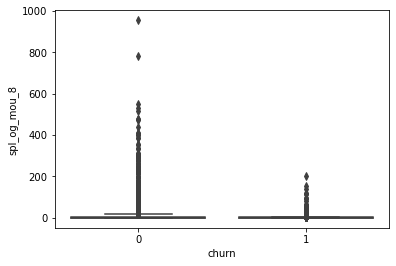

In [25]:
sns.boxplot(df_telecom.churn, df_telecom.spl_og_mou_8)
plt.show()

Text(0.5, 1.0, 'onnet_mou_8 vs offnet_mou_8')

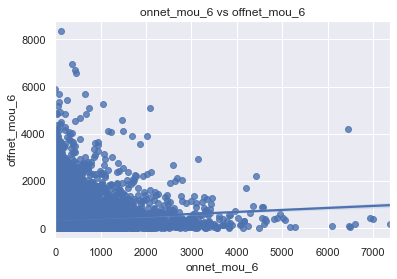

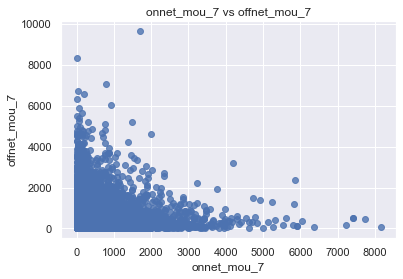

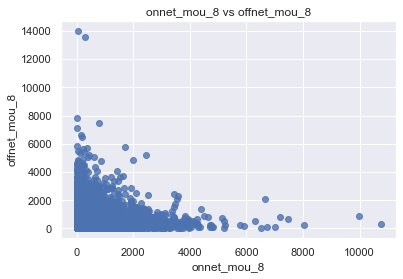

In [26]:
plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="onnet_mou_6", y="offnet_mou_6", data=df_telecom)
plt.title('onnet_mou_6 vs offnet_mou_6')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="onnet_mou_7", y="offnet_mou_7", data=df_telecom, fit_reg = False)
plt.title('onnet_mou_7 vs offnet_mou_7')

plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="onnet_mou_8", y="offnet_mou_8", data=df_telecom, fit_reg = False)
plt.title('onnet_mou_8 vs offnet_mou_8')

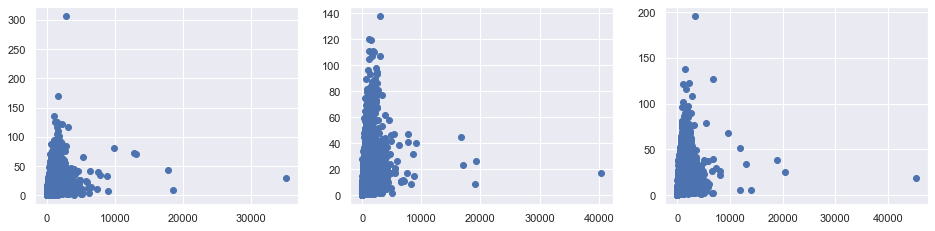

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_telecom.total_rech_amt_6,df_telecom.total_rech_num_6)
plt.subplot(2,3,2)
plt.scatter(df_telecom.total_rech_amt_7,df_telecom.total_rech_num_7)
plt.subplot(2,3,3)
plt.scatter(df_telecom.total_rech_amt_8,df_telecom.total_rech_num_8)


In [28]:
def outliers(x):
    list = []
    for col in num_cols:
        Q1 = x[col].quantile(.01)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_telecom = outliers(df_telecom)

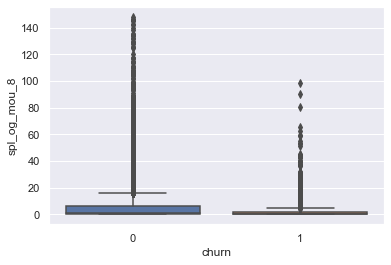

In [29]:
sns.boxplot(df_telecom.churn, df_telecom.spl_og_mou_8)
plt.show()

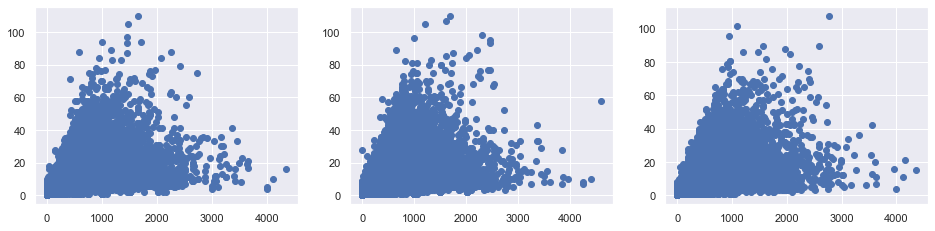

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_telecom.total_rech_amt_6,df_telecom.total_rech_num_6)
plt.subplot(2,3,2)
plt.scatter(df_telecom.total_rech_amt_7,df_telecom.total_rech_num_7)
plt.subplot(2,3,3)
plt.scatter(df_telecom.total_rech_amt_8,df_telecom.total_rech_num_8)

Text(0.5, 1.0, 'onnet_mou_8 vs offnet_mou_8')

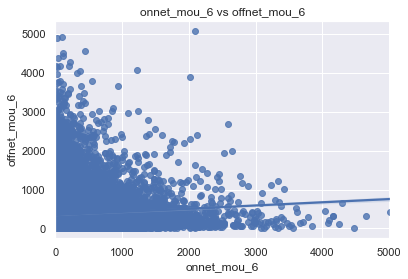

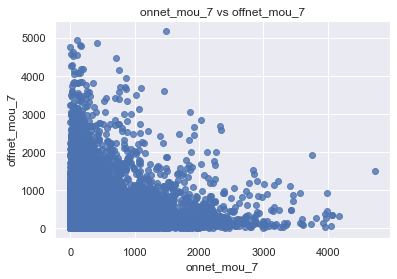

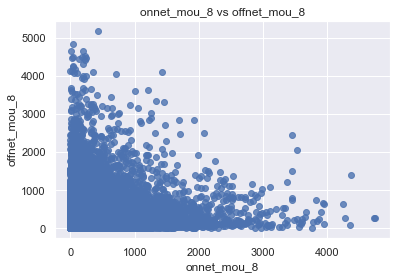

In [31]:
plt.figure(2)
sns.set(color_codes=True)
ax = sns.regplot(x="onnet_mou_6", y="offnet_mou_6", data=df_telecom)
plt.title('onnet_mou_6 vs offnet_mou_6')

plt.figure(3)
sns.set(color_codes=True)
ax = sns.regplot(x="onnet_mou_7", y="offnet_mou_7", data=df_telecom, fit_reg = False)
plt.title('onnet_mou_7 vs offnet_mou_7')

plt.figure(5)
sns.set(color_codes=True)
ax = sns.regplot(x="onnet_mou_8", y="offnet_mou_8", data=df_telecom, fit_reg = False)
plt.title('onnet_mou_8 vs offnet_mou_8')

## Exploratory Data Analysis¶


In [32]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = df_telecom
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [33]:
recharge_amnt_columns =  df_telecom.columns[df_telecom.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8']

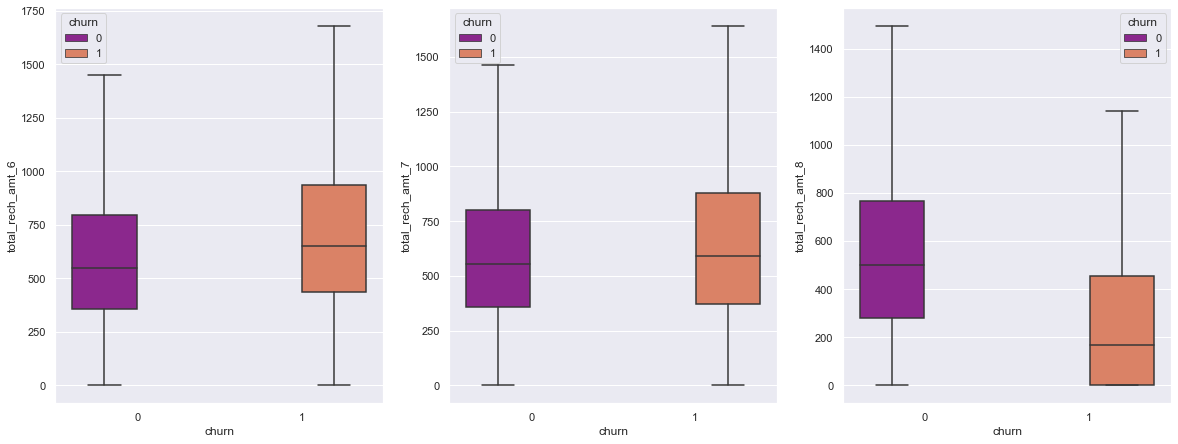

In [34]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

A drop in the total recharge amount for churned customers in the 8th Month (Action Phase)

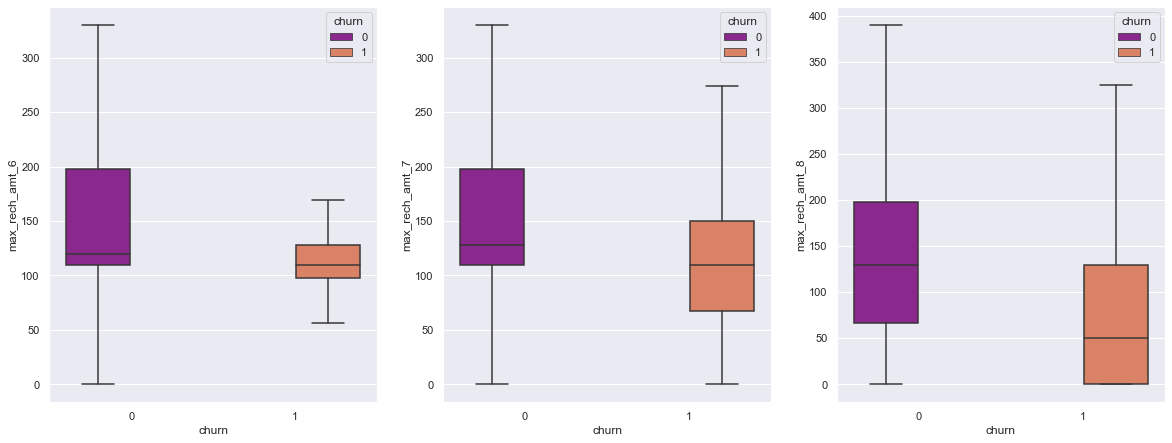

In [35]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

There is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

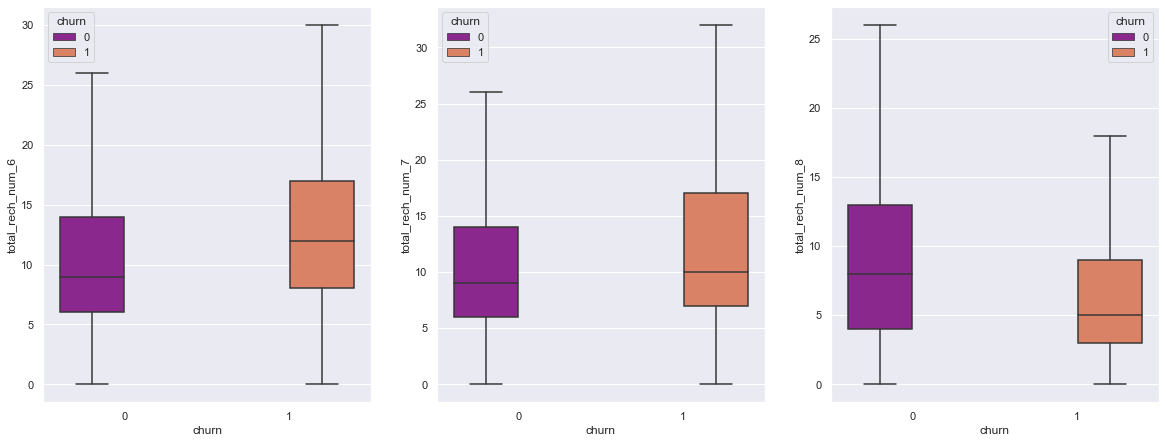

In [36]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

There is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

In [37]:
usage_2g_and_3g = df_telecom.columns[df_telecom.columns.str.contains('2g|3g',regex=True)]

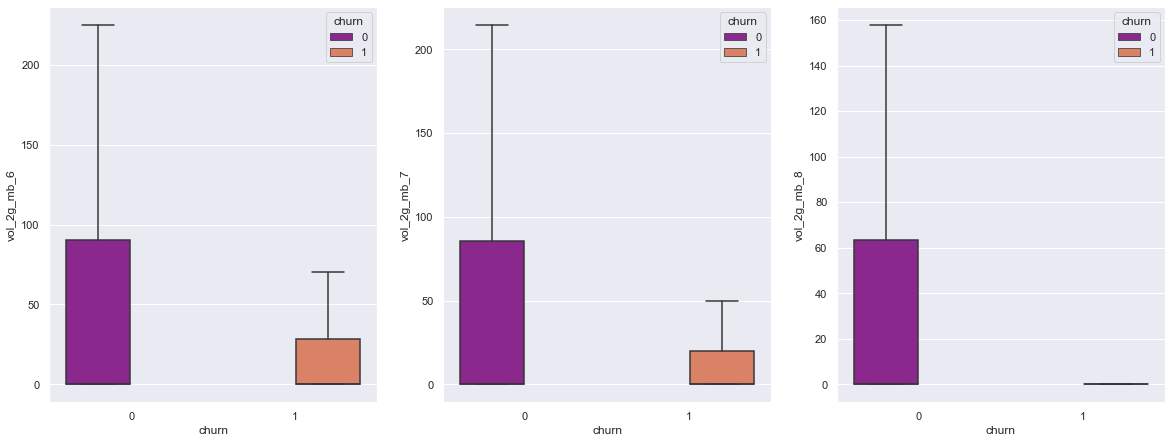

In [38]:
plot_box_chart('vol_2g_mb')

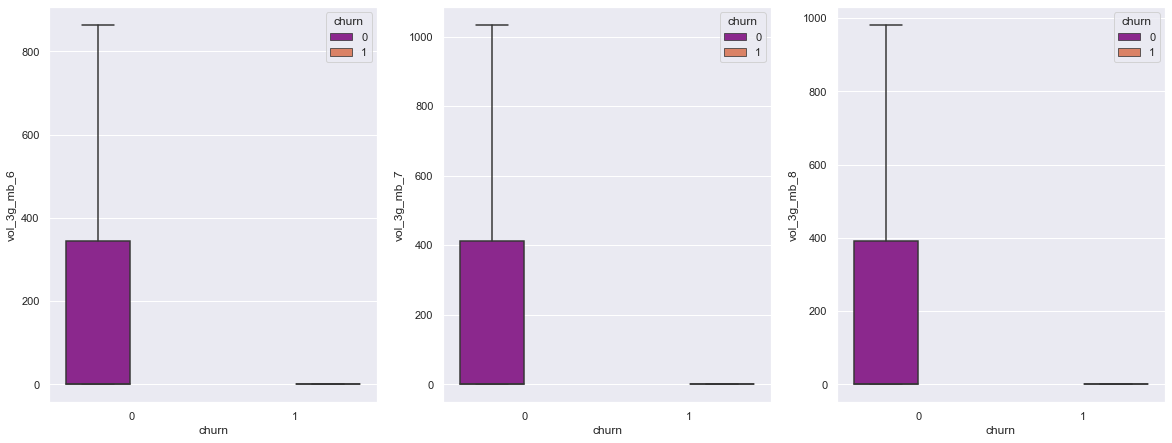

In [39]:
plot_box_chart('vol_3g_mb')

- 2G and 3G usage for churned customers drops in 8th month
- 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

In [40]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

In [41]:
# let's check monthly 2G/3G service schemes
subcription_2g_3g = df_telecom.columns[df_telecom.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

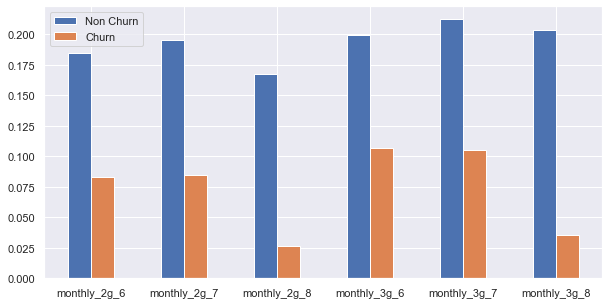

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.185010,0.195084,0.167268,0.199436,0.212370,0.203706
Churn,0.083275,0.084686,0.026112,0.106563,0.105152,0.035286


In [42]:
plot_mean_bar_chart(df_telecom,subcription_2g_3g)

a drop in monthly subscription for churned customers in 8th Month.

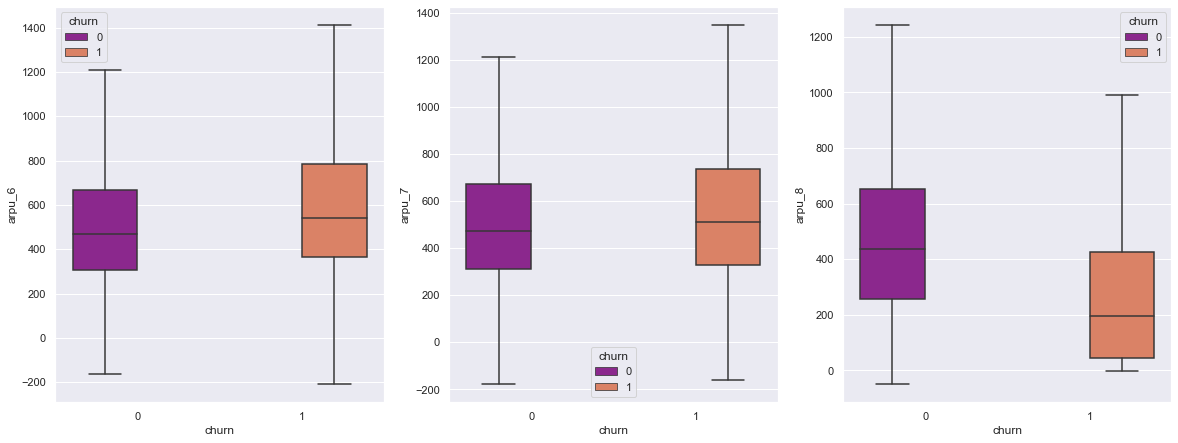

In [43]:
# average revenue per user
arpu_cols = df_telecom.columns[df_telecom.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

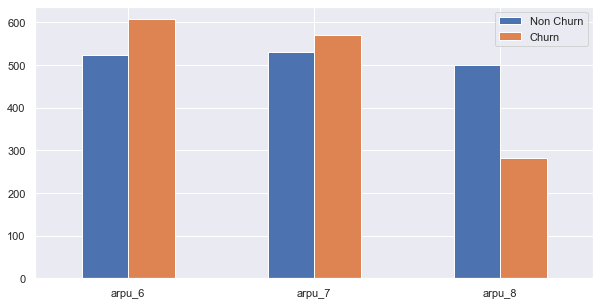

,arpu_6,arpu_7,arpu_8
Non Churn,524.683775,531.655549,499.397863
Churn,606.892661,571.233383,282.285728


In [44]:
plot_mean_bar_chart(df_telecom, arpu_cols)

huge drops for Arpu in 8th month for churned customers

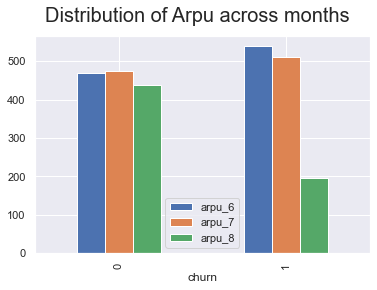

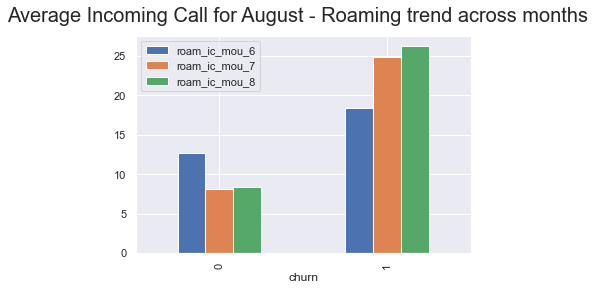

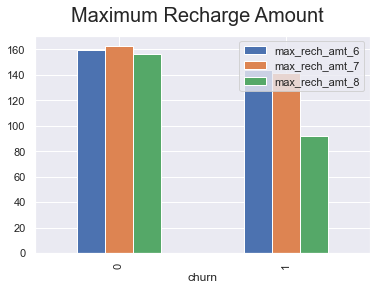

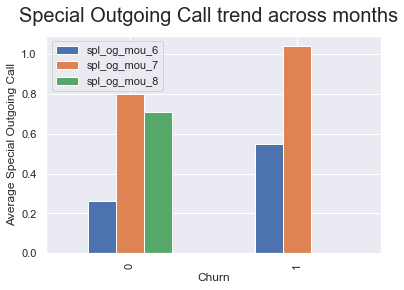

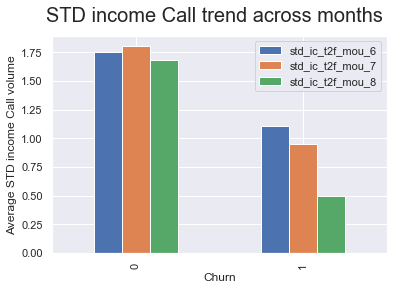

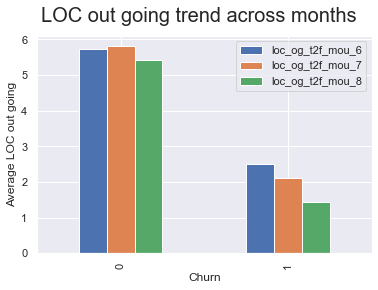

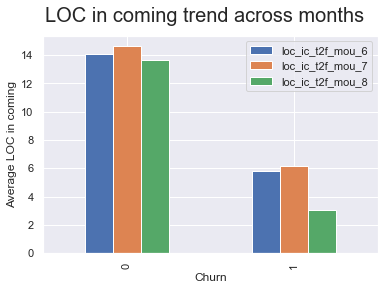

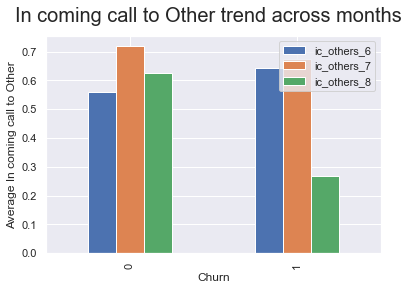

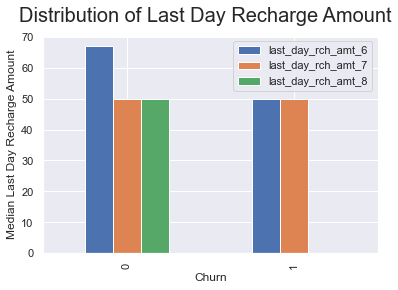

In [45]:
df_telecom['churn'] = df_telecom['churn'].astype('object', copy = False)
df_sample = df_telecom.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = df_telecom.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = df_telecom.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = df_telecom.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()


df_sample = df_telecom.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()


df_sample = df_telecom.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

df_sample = df_telecom.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

df_sample = df_telecom.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

df_telecom['churn'] = df_telecom['churn'].astype('object', copy = False)
df_sample = df_telecom.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

## Derive New Features¶


In [46]:
# Average roaming minutes of usage across 3 months
df_telecom['avg_roam_mou']= (df_telecom.roam_ic_mou_6 + df_telecom.roam_ic_mou_7 + 
                               df_telecom.roam_ic_mou_8 + df_telecom.roam_og_mou_6 + 
                               df_telecom.roam_og_mou_7 + df_telecom.roam_og_mou_8)/3

In [47]:
# lets now conevrt AON in months
df_telecom['aon_mon'] = df_telecom['aon']/30
df_telecom.drop('aon', axis=1, inplace=True)
df_telecom['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

In [48]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_telecom['tenure_range'] = pd.cut(df_telecom['aon_mon'], tn_range, labels=tn_label)
df_telecom['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

##### create Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase, for now to see if it can give any additional insight

In [49]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = df_telecom.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df_telecom.shape)
# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_telecom[avg_col_name] = (df_telecom[col_6]  + df_telecom[col_7])/ 2

(25540, 128)


In [50]:
col_to_drop = df_telecom.filter(regex='_6|_7').columns
df_telecom.drop(col_to_drop, axis=1, inplace=True)


In [51]:
df_telecom.shape

(25540, 88)

Text(0.5, 1.0, 'Tenure Graph')

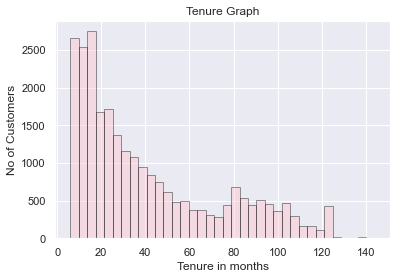

In [52]:
ax = sns.distplot(df_telecom['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
# below graph simply shows the tenure of the customers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

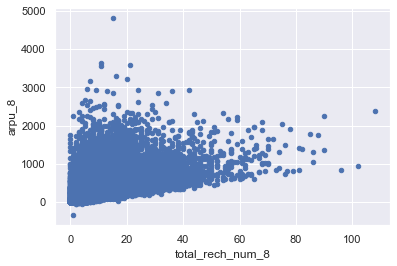

In [53]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
df_telecom[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='aon_mon', ylabel='avg_arpu_av67'>

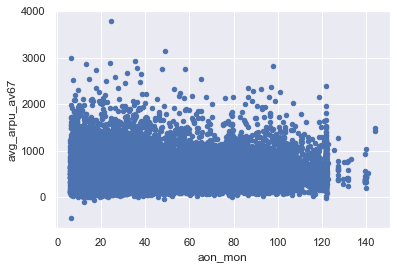

In [54]:
# plot between tenure and revenue
df_telecom[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

<AxesSubplot:xlabel='churn', ylabel='aon_mon'>

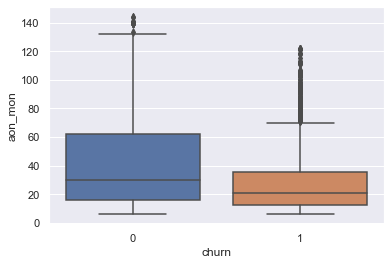

In [55]:
sns.boxplot(x = df_telecom.churn, y = df_telecom.aon_mon)

Text(0.5, 1.0, 'Churn Vs Base Cost')

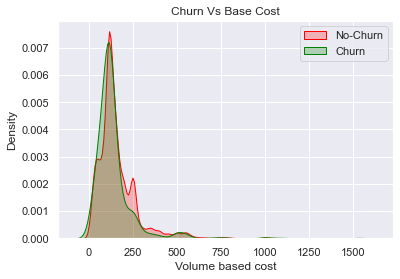

In [56]:
# churn Vs Base Cost
ax = sns.kdeplot(df_telecom.avg_max_rech_amt_av67[(df_telecom["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_telecom.avg_max_rech_amt_av67[(df_telecom["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

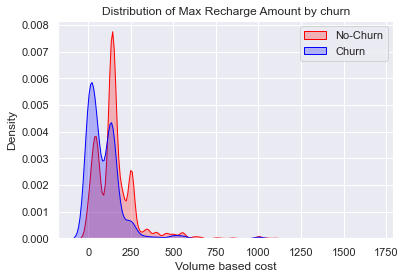

In [57]:
# churn vs max rechare amount
ax = sns.kdeplot(df_telecom.max_rech_amt_8[(df_telecom["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_telecom.max_rech_amt_8[(df_telecom["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

## Model Building

In [58]:
df_telecom.drop('tenure_range', axis=1, inplace=True)

In [59]:
df_telecom.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_roam_mou,aon_mon,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,19.38,18.74,0.0,1,51.916667,26.733333,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,910.65,122.16,0.0,0,0.000000,10.500000,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0,0.000000,24.000000,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,51.86,0.00,0.0,0,0.000000,20.133333,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,145.520,0.255,8.660,0.000,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,89.5,0.240,299.545,0.0,0.0,1.0,0.0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,2706.83,1714.67,0.0,0,0.000000,44.266667,1669.9265,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,1.155,0.000,1.020,2.180,1.455,2.365,0.595,4.420,7.540,0.000,0.000,0.940,10.5,1932.0,753.5,126.0,72.405,5832.275,0.0,0.0,4.5,2.0


In [60]:
# we will create a new dataset for model building
df_model = df_telecom[:].copy()
df_model.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_roam_mou,aon_mon,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,19.38,18.74,0.0,1,51.916667,26.733333,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,910.65,122.16,0.0,0,0.000000,10.500000,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0,0.000000,24.000000,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,51.86,0.00,0.0,0,0.000000,20.133333,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,145.520,0.255,8.660,0.000,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,89.5,0.240,299.545,0.0,0.0,1.0,0.0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,2706.83,1714.67,0.0,0,0.000000,44.266667,1669.9265,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,1.155,0.000,1.020,2.180,1.455,2.365,0.595,4.420,7.540,0.000,0.000,0.940,10.5,1932.0,753.5,126.0,72.405,5832.275,0.0,0.0,4.5,2.0


In [61]:
df_model.shape

(25540, 87)

In [62]:
# lets create X & y dataset for model building, X will not have "churn" and y will have only "churn"
X = df_model.drop(['churn'], axis=1)


In [63]:
y = df_model['churn']

In [64]:
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_roam_mou,aon_mon,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,57.74,19.38,18.74,0.0,51.916667,26.733333,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,21.03,910.65,122.16,0.0,0.000000,10.500000,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.00,0,0,0,0,0.00,0.00,0.00,0.0,0.000000,24.000000,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,0.01,1009.92,0,0,1,1,40.45,51.86,0.00,0.0,0.000000,20.133333,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,145.520,0.255,8.660,0.000,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,89.5,0.240,299.545,0.0,0.0,1.0,0.0
33,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.0,0.56,2.45,37.93,0.16,40.54,0.05,0.86,0.13,1.04,41.79,0.0,0.00,0.20,1,455,455,455,7.97,7701.01,0,0,1,0,358.10,2706.83,1714.67,0.0,0.000000,44.266667,1669.9265,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,1.155,0.000,1.020,2.180,1.455,2.365,0.595,4.420,7.540,0.000,0.000,0.940,10.5,1932.0,753.5,126.0,72.405,5832.275,0.0,0.0,4.5,2.0


In [65]:
X.shape

(25540, 86)

In [66]:
y.head()

7     1
8     0
21    0
23    0
33    0
Name: churn, dtype: object

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [68]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [69]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [70]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [71]:
#perform minmax scaling before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
# fit transform the scaler on train
X_train_scaled = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test_scaled = scaler.transform(X_test)

# logistic regression Without PCA

In [73]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [74]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   19.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [75]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8867873239060158
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [76]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6449  786]
 [ 138  289]]
Sensitivity: 	0.68
Specificity: 	0.89
ROC:    	 0.86


### PCA For Dimension Reduction

In [77]:
#lets perform PCA on sampled data. import PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [78]:
#lets fit PCA on the train dataset
pca.fit(X_train_scaled)

PCA(random_state=42, svd_solver='randomized')

In [79]:
pca.explained_variance_ratio_[:50]

array([0.13902658, 0.10383446, 0.06180936, 0.04801463, 0.04178153,
       0.03778193, 0.03619692, 0.02701917, 0.02565538, 0.02493   ,
       0.02370363, 0.02287251, 0.02075946, 0.0199501 , 0.01834902,
       0.0171405 , 0.01635141, 0.01531632, 0.01428564, 0.01321175,
       0.01289477, 0.01261253, 0.01221641, 0.01164067, 0.01160366,
       0.0109803 , 0.01038431, 0.0102253 , 0.00965159, 0.00919499,
       0.00902722, 0.00847925, 0.00832744, 0.00811889, 0.00750902,
       0.00738158, 0.00689777, 0.00661265, 0.0063509 , 0.00627073,
       0.00552961, 0.00532085, 0.00511145, 0.00504355, 0.0047876 ,
       0.00449962, 0.00417359, 0.0040813 , 0.0040279 , 0.00380647])

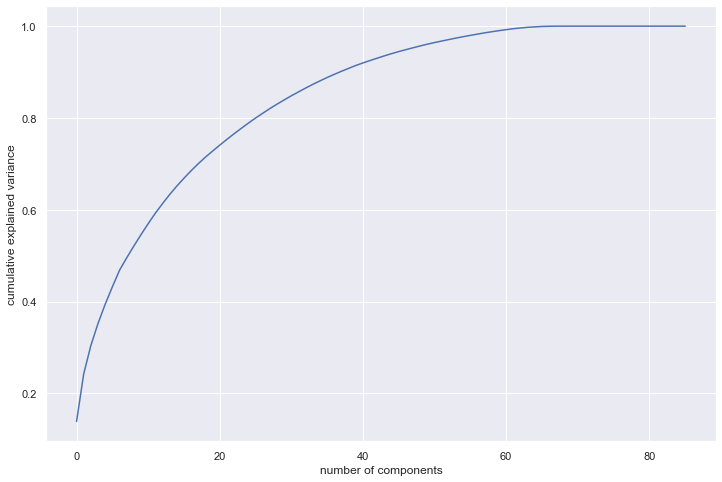

In [80]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Plot shows that 55 components are enough to explain close to 95% variance


In [81]:
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=55)

In [82]:
X_train_pca = pca_again.fit_transform(X_train_scaled)
X_train_pca.shape

(17878, 55)

In [83]:
X_test_pca = pca_again.transform(X_test_scaled)
X_test_pca.shape

(7662, 55)

## Losgistic Regression with PCA

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
train_pca = LogisticRegression(class_weight={0:0.1, 1: 0.9})
train_pca.fit(X_train_pca,y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [85]:
train_predictions = train_pca.predict(X_train_pca)
train_predprob = train_pca.predict_proba(X_train_pca)[:,1]

In [86]:
print ("roc_auc_score :",metrics.roc_auc_score(y_train, train_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train, train_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train, train_predprob))

roc_auc_score : 0.8073433888864965
Recall/Sensitivity : 0.7212121212121212
AUC Score (Train): 0.8919455090937799


In [87]:
pred_prob_test = train_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_prob_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_prob_test)))
print('precision score:',(metrics.precision_score(y_test, pred_prob_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_prob_test)))

Roc_auc_score : 0.7861575835654483
precision score: 0.27281279397930386
Sensitivity/Recall : 0.6791569086651054
Specificity: 0.8931582584657913
False Positive Rate: 0.10684174153420871
Positive predictive value: 0.27281279397930386
Negative Predictive value: 0.9792392786785876
Accuracy : 0.881232054293918


In [88]:
#lets check with probability cutoff 0.5
y_train_pred = train_pca.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.006569,0
1,0,0.019794,0
2,0,0.046733,0
3,0,0.010082,0
4,0,0.110552,0


In [89]:
#lets define function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

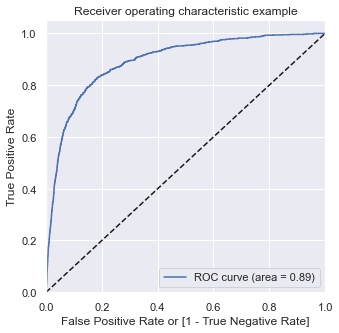

In [91]:
#lets draw roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006569,0,1,0,0,0,0,0,0,0,0,0
1,0,0.019794,0,1,0,0,0,0,0,0,0,0,0
2,0,0.046733,0,1,0,0,0,0,0,0,0,0,0
3,0,0.010082,0,1,0,0,0,0,0,0,0,0,0
4,0,0.110552,0,1,1,0,0,0,0,0,0,0,0


In [93]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.055375  1.000000  0.000000
0.1   0.1  0.507495  0.954545  0.481288
0.2   0.2  0.666685  0.916162  0.652061
0.3   0.3  0.765354  0.862626  0.759652
0.4   0.4  0.837957  0.801010  0.840123
0.5   0.5  0.883936  0.721212  0.893475
0.6   0.6  0.914196  0.639394  0.930306
0.7   0.7  0.931928  0.520202  0.956063
0.8   0.8  0.941660  0.329293  0.977558
0.9   0.9  0.946191  0.131313  0.993960


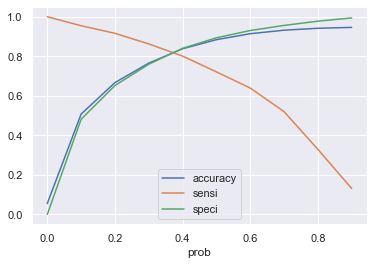

In [94]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006569,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.019794,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.046733,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.010082,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.110552,0,1,1,0,0,0,0,0,0,0,0,0


In [96]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = train_pca.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.006569,0
1,0,0.019794,0
2,0,0.046733,0
3,0,0.010082,0
4,0,0.110552,0


In [97]:
#print all scores
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.820620523089732
precision score: 0.2155448717948718
Sensitivity/Recall : 0.8151515151515152
Specificity: 0.8260895310279488
False Positive Rate: 0.17391046897205117
Positive predictive value: 0.2155448717948718
Negative Predictive value: 0.9870524975237017


In [98]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = train_pca.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,6.958077e-01,1
1,0,1.590513e-01,0
2,0,9.999543e-02,0
3,0,2.347575e-01,0
4,0,3.792635e-11,0


In [99]:
#lets find out all scores of test dataset
#print all scores
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.7899608169369234
precision score : 0.1986552567237164
Sensitivity/Recall : 0.7611241217798594
Specificity: 0.8187975120939875
False Positive Rate: 0.18120248790601243
Positive predictive value: 0.1986552567237164
Negative Predictive value: 0.9830733488217723


- stats with logistics regression on Test Dataset is:
   -  Sensitivity/Recall :0.7611241217798594
   -  Specificity: 0.8187975120939875

- Stats On Train dataset was:
  -  Sensitivity/Recall : 0.8151515151515152
  -  Specificity: 0.8260895310279488

## PCA and Logistic Regression using Pipeline


In [100]:
# create pipeline
PCA_VARS = 55
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight={0:0.1, 1: 0.9}))
        ]
pipeline = Pipeline(steps)

In [101]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8849983219599508

## Evaluate on test data

In [102]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6467  768]
 [ 137  290]]
Sensitivity: 	0.68
Specificity: 	0.89
AUC:    	 0.86


In [103]:
pipeline.score(X_test, y_test)

0.8818846254241712

## Hyperparameter tuning - PCA and Logistic Regression


In [104]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [105]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   53.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [106]:
# cross validation results
pd.DataFrame(model.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.521400,0.031212,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,0.599201,0.012984,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,1.811401,0.177746,0.044400,0.007501,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.893305,0.885881,0.871906,0.889637,0.874657,0.883077,0.008381,16
3,1.286401,0.018203,0.064199,0.011632,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.894327,0.887057,0.872810,0.891831,0.875601,0.884325,0.008632,13
4,1.452400,0.136757,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,0.533398,0.027164,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,1.782201,0.169782,0.053799,0.007335,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.894451,0.886027,0.872809,0.890368,0.876138,0.883959,0.008257,15
7,1.436600,0.024496,0.052600,0.005749,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.896104,0.887630,0.874198,0.893507,0.877180,0.885724,0.008693,7
8,1.439999,0.023468,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,0.548799,0.045419,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [107]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8867912121840982
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [108]:
# PCA LogisticRegression with best parameters
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [80], 'logistic__C': [10], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [109]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [10], 'logistic__penalty': ['l2'],
                         'pca__n_components': [80]},
             scoring='roc_auc', verbose=1)

In [110]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6449  786]
 [ 138  289]]
Sensitivity: 	0.68
Specificity: 	0.89
AUC:    	 0.86


In [111]:
pipeline.score(X_test, y_test)

0.8818846254241712

Logistic model performance is improved after hyperparameter tuning with PCA

#### Now lets try with some High Performance models with PCA

## DecisionTreeClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt = DecisionTreeClassifier(max_depth=5, class_weight={0:0.1, 1: 0.9})
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=5)

In [113]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = dt.predict(X_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('Acuracy Score', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7235
           1       0.23      0.57      0.33       427

    accuracy                           0.87      7662
   macro avg       0.60      0.73      0.63      7662
weighted avg       0.93      0.87      0.90      7662

[[6428  807]
 [ 182  245]]
Acuracy Score 0.8709214304359175


In [114]:
confusion_tree = confusion_matrix(y_test,y_pred)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.8709214304359175
Sensitivity:  0.5737704918032787
Specificity:  0.8884588804422944
false postive rate:  0.1115411195577056
positive predictive value:  0.23288973384030418
Negative predictive value:  0.972465960665658
Misclassification Rate:  0.12907856956408248


#### Hyperparamenter tuning for DecisionTreeClassifier

In [115]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  9.5min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [116]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8621201795966897
DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=5, min_samples_leaf=65, min_samples_split=165)


In [117]:
# model with optimal hyperparameters
clf_entropy= DecisionTreeClassifier(criterion = "entropy",class_weight={0:0.1, 1: 0.9},
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_entropy.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [118]:
y_pred_default = clf_entropy.predict(X_test_pca)
confusion_tree=confusion_matrix(y_test,y_pred)
confusion_tree

array([[6428,  807],
       [ 182,  245]], dtype=int64)

In [119]:
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.5737704918032787
Specificity:  0.8884588804422944
false postive rate:  0.1115411195577056
positive predictive value:  0.23288973384030418
Negative predictive value:  0.972465960665658
Misclassification Rate:  0.12907856956408248


## Random forest

In [120]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

# fit
rfc.fit(X_train_pca,y_train)

# Making predictions
y_pred = rfc.predict(X_test_pca)

In [121]:
confusion_rf=confusion_matrix(y_test,y_pred)
confusion_rf

array([[7205,   30],
       [ 394,   33]], dtype=int64)

In [122]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.07728337236533958
Specificity:  0.9958534899792675
false postive rate:  0.00414651002073255
positive predictive value:  0.5238095238095238
Negative predictive value:  0.9481510725095408
Misclassification Rate:  0.055338031845471154


In [123]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [124]:
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 15.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [125]:
print('accuracy',grid_search.best_score_,'using',grid_search.best_params_)

accuracy 0.9259429921309115 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 200}


In [126]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight={0:0.1, 1: 0.9},
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [127]:
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=8,
                       max_features=8, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [128]:
# predict
y_pred = rfc.predict(X_test_pca)

In [129]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('accuracy_score:  ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7235
           1       0.36      0.45      0.40       427

    accuracy                           0.93      7662
   macro avg       0.67      0.70      0.68      7662
weighted avg       0.93      0.93      0.93      7662

[[6899  336]
 [ 234  193]]
accuracy_score:   0.9256068911511355


In [131]:
# Confusion Matrix
confusion_rf=confusion_matrix(y_test,y_pred)
confusion_rf

array([[6899,  336],
       [ 234,  193]], dtype=int64)

In [132]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.9256068911511355
Sensitivity:  0.4519906323185012
Specificity:  0.9535590877677954
false postive rate:  0.04644091223220456
positive predictive value:  0.3648393194706994
Negative predictive value:  0.9671947287256414
Misclassification Rate:  0.07439310884886452


## Baseline Model Building


In [133]:
# List to store the model scores
model_score_list = []

In [134]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## Ridge Classifier

In [135]:
# initialize the Ridge Classifier
model = RidgeClassifier(class_weight={0:0.1, 1: 0.9}, random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RidgeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  89.34
ROC AUC score :  76.61
Precision score :  28.85
Recall score :  62.3


## SGDClassifier

In [136]:
# initialize the SGDClassifier
model = SGDClassifier(class_weight={0:0.1, 1: 0.9}, random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'SGDClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  92.56
ROC AUC score :  70.28
Precision score :  36.48
Recall score :  45.2


## KNeighbors classifiers

In [137]:
# initialize the KNeighbors classifiers
model = KNeighborsClassifier()
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'KNeighborsClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  93.93
ROC AUC score :  58.77
Precision score :  40.59
Recall score :  19.2


## SVC rbf kernel

In [138]:
# initialize the SVC rbf kernel
model = SVC(kernel='rbf', class_weight={0:0.1, 1: 0.9}, random_state=42)
# fit the pca training data
model.fit(X_train_pca, y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'SVC_Kernel_rbf', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  90.13
ROC AUC score :  76.37
Precision score :  30.62
Recall score :  60.89


In [139]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
0,RidgeClassifier,89.34,76.61,28.85,62.30
3,SVC_Kernel_rbf,90.13,76.37,30.62,60.89
1,SGDClassifier,92.56,70.28,36.48,45.20
2,KNeighborsClassifier,93.93,58.77,40.59,19.20


## Random ForesRandomForest model with All feature 



In [140]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight={0:0.1, 1: 0.9})

In [141]:
# Create the parameter grid based on the results of random search 
param = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}


In [142]:
#Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [143]:
%%time
grid_search.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  6.2min finished


Wall time: 6min 19s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             scoring='accuracy', verbose=1)

In [144]:
grid_search.best_score_

0.9255511620444694

In [145]:
# predict
predictions = grid_search.predict(X_test)

In [146]:
# predict churn on test data
y_pred = grid_search.predict(X_test_scaled)

# create onfusion matrix
confusion_rm_f = confusion_matrix(y_test, y_pred)
print(cm)

TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate


[[6449  786]
 [ 138  289]]
Accuracy Score:  0.944270425476377
Sensitivity:  0.6159250585480094
Specificity:  0.9409813407049067
false postive rate:  0.0590186592950933
positive predictive value:  0.38115942028985506
Negative predictive value:  0.9764773379231211


###### RandomForest model with All feature gives:
- 94.4%  Accuracy, 94.0%  Specificity and  Sensitivity  0.6159250585480094

## Choosing best features

In [147]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=8,
                       max_features=8, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [148]:
rf_best.feature_importances_

array([3.00842523e-02, 4.53288810e-03, 9.04654517e-03, 7.59318234e-02,
       6.98937641e-02, 2.10142319e-02, 3.29482514e-02, 1.25696503e-02,
       3.97664670e-04, 3.38366698e-02, 1.87023809e-03, 4.15395187e-03,
       1.48205879e-04, 4.29613614e-03, 5.06746226e-05, 2.55294651e-03,
       0.00000000e+00, 2.76555407e-02, 3.39030434e-02, 7.09856097e-02,
       1.65279075e-02, 9.33784267e-02, 2.21288357e-03, 6.50382481e-03,
       1.67073719e-03, 1.61311910e-02, 8.31027915e-02, 1.36972327e-03,
       3.12420304e-04, 4.27017318e-04, 7.50635061e-03, 3.72328916e-02,
       1.35183981e-02, 5.54730154e-02, 2.33993735e-02, 1.60436862e-02,
       7.73730083e-04, 1.22232887e-03, 6.42475846e-04, 1.91221642e-05,
       6.43340996e-03, 1.62766838e-03, 1.28489048e-03, 7.98471791e-04,
       3.47974399e-02, 5.24107260e-03, 6.95481145e-03, 7.95289400e-03,
       5.55509335e-03, 3.61537048e-03, 8.94866238e-03, 2.90897900e-03,
       3.34942232e-03, 3.21366416e-03, 8.05088797e-04, 4.74744273e-03,
      

In [149]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [150]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
21,loc_ic_mou_8,0.093378
26,total_ic_mou_8,0.083103
3,roam_ic_mou_8,0.075932
19,loc_ic_t2m_mou_8,0.070986
4,roam_og_mou_8,0.069894
33,last_day_rch_amt_8,0.055473
31,total_rech_amt_8,0.037233
44,avg_roam_mou,0.034797
18,loc_ic_t2t_mou_8,0.033903
9,loc_og_mou_8,0.033837


## Feature Importance


In [151]:
# predictors
features = df_telecom.drop('churn', axis=1).columns

# feature_importance
importance = rf_best.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,loc_ic_mou_8,9.337843
1,total_ic_mou_8,8.310279
2,roam_ic_mou_8,7.593182
3,loc_ic_t2m_mou_8,7.098561
4,roam_og_mou_8,6.989376
5,last_day_rch_amt_8,5.547302
6,total_rech_amt_8,3.723289
7,avg_roam_mou,3.479744
8,loc_ic_t2t_mou_8,3.390304
9,loc_og_mou_8,3.383667


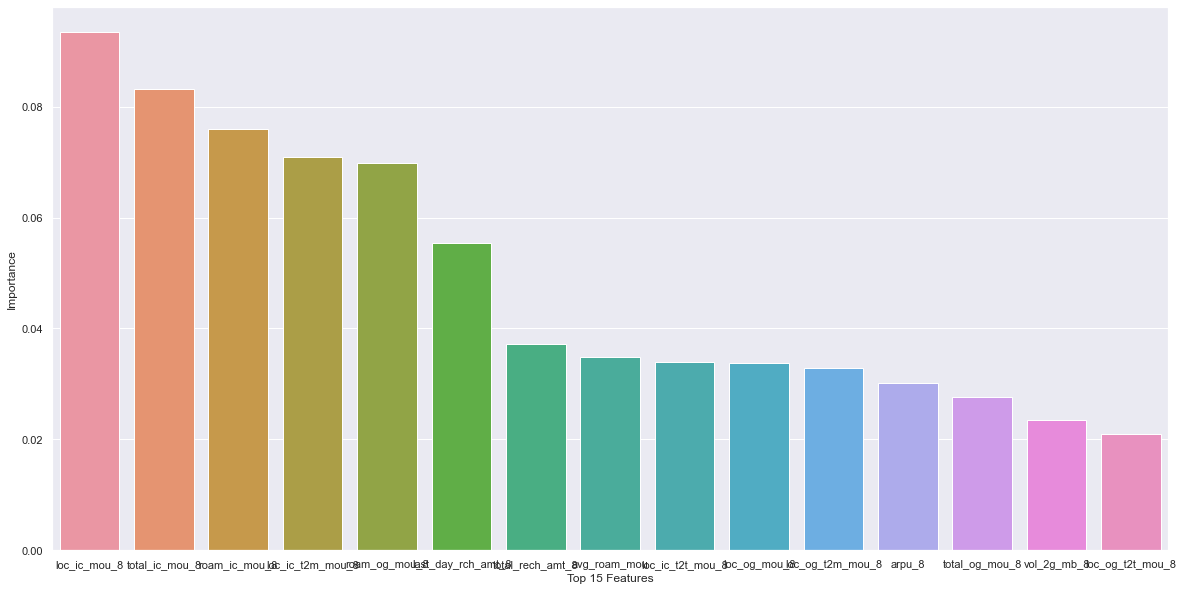

In [152]:
imp=rf_best.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:15])
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.show()

In [153]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:30]
top_features

0                loc_ic_mou_8
1              total_ic_mou_8
2               roam_ic_mou_8
3            loc_ic_t2m_mou_8
4               roam_og_mou_8
5          last_day_rch_amt_8
6            total_rech_amt_8
7                avg_roam_mou
8            loc_ic_t2t_mou_8
9                loc_og_mou_8
10           loc_og_t2m_mou_8
11                     arpu_8
12             total_og_mou_8
13                vol_2g_mb_8
14           loc_og_t2t_mou_8
15           loc_ic_t2f_mou_8
16               std_ic_mou_8
17                vol_3g_mb_8
18             max_rech_amt_8
19           loc_og_t2f_mou_8
20        avg_std_og_mou_av67
21               offnet_mou_8
22       avg_roam_og_mou_av67
23         avg_onnet_mou_av67
24      avg_total_og_mou_av67
25    avg_total_rech_amt_av67
26           total_rech_num_8
27              avg_arpu_av67
28           std_ic_t2m_mou_8
29                 aug_vbc_3g
Name: variables, dtype: object

### Business Insights


ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased and the  customers without any recharge amount.

roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

std_ic_t2f_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased

- Churners show higher roaming usage than non-churners.
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like,
- Discounted roaming rates during particular hours of the day.
- Free monthly roaming mou's depending on the users past roaming mou usage.

 It is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers.